# Dataset: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1538]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1539]:
df = pd.read_csv('data\Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Data Analysis & Preprocessing

In [1540]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [1541]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [1542]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [1543]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [1544]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [1545]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [1546]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [1547]:
df['location'].value_counts()

location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

## Dropping unimportant columns

In [1548]:
df.drop(columns=['area_type', 'availability', 'society'], inplace=True)
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


## Handling NaN/Null Values

In [1549]:
df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [1550]:
df[['balcony', 'bath']] = df[['balcony', 'bath']].fillna(0)
df.isna().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [1551]:
df = df.dropna()
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [1552]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,0.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


## Handling Colums with non-standard inputs.

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [1553]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [1554]:
df = df.copy()
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if pd.notna(x) else 0)
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [1555]:
df[df.bhk > 20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [1556]:
df

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


Explore total_sqft feature

In [1557]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [1558]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [1559]:
df[~df['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,0.0,0.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,0.0,0.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,0.0,0.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


In [1560]:
df[~df['total_sqft'].apply(is_float)].shape

(239, 7)

Above shows that 'total_sqft' can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion or can just drop such corner cases to keep things simple.

In [1561]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None   

In [1562]:
# def convert_sqft_to_num(x):
#     if isinstance(x, str) and '-' in x:
#         tokens = x.split('-')
#         return (float(tokens[0]) + float(tokens[1])) / 2
#     try:
#         return float(x)
#     except:
#         return None

In [1563]:
print(convert_sqft_to_num('1056'))
print(convert_sqft_to_num('2100 - 2850'))
print(convert_sqft_to_num('34.46Sq. Meter'))

1056.0
2475.0
None


In [1564]:
df = df.copy()

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df[df['total_sqft'].notnull()]
df[~df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bhk


In [1565]:
df

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850.

In [1566]:
df.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [1567]:
df.drop(columns='size', inplace=True)
df

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Richards Town,3600.0,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


## Feature Engineering

Add new feature -> price per square feet

In [1568]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [1569]:
df_stats = df['price_per_sqft'].describe()
df_stats

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Examine locations -> categorical variable.

In [1570]:
len(df.location.unique())

1298

High Dimensionality Problem / Dimensionality Curse => Apply dimensionality reduction technique to reduce the number of locations.

In [1571]:
df.location = df.location.apply(lambda x: x.strip()) # removing ' ' (space) from the location column

# location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield                               538
Sarjapur  Road                           397
Electronic City                          304
Kanakpura Road                           271
Thanisandra                              236
                                        ... 
Kanakapura main  Road                      1
Masjid e Alkareem                          1
Sindhi Colony                              1
Kanakapur main road                        1
Bidere Agarahara, Behind Safal market      1
Name: count, Length: 1287, dtype: int64

In [1572]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Ganga Nagar                              10
1st Block Koramangala                    10
Dodsworth Layout                         10
Nagadevanahalli                          10
Thyagaraja Nagar                         10
                                         ..
Kanakapura main  Road                     1
Masjid e Alkareem                         1
Sindhi Colony                             1
Kanakapur main road                       1
Bidere Agarahara, Behind Safal market     1
Name: count, Length: 1047, dtype: int64

### Dimensionality Reduction:
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [1573]:
print(len(df.location.unique()))

df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

print(len(df.location.unique()))

1287
241


In [1574]:
df

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


## Outlier Detection & Removal

### Using Business Logic

Normally square ft per bedroom is '300' i.e. '2 bhk' apartment is minimum '600 sqft'. If we have '400 sqft' apartment with '2 bhk' than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum threshold per bhk to be '300 sqft'.

In [1575]:
df[df.total_sqft / df.bhk < 300]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,1020.0,6.0,0.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,0.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,1400.0,7.0,0.0,218.0,7,15571.428571
13279,other,1200.0,5.0,0.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely.

In [1576]:
df.shape

(13257, 7)

In [1577]:
df = df[~(df.total_sqft / df.bhk < 300)]
df

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


### Using Standard Deviation and Mean

In [1578]:
df.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is '267 rs/sqft' whereas max is '12000000 rs/sqft', this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation.

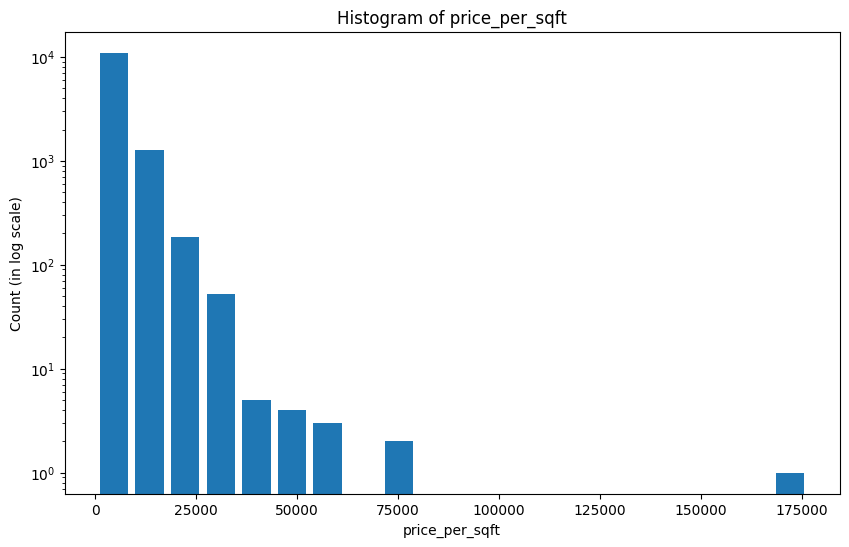

In [1579]:
def plot_histogram(df, column, bins=20, rwidth=0.8):
    plt.rcParams['figure.figsize'] = (10, 6)
    
    plt.hist(df[column], bins=bins, rwidth=rwidth)
    plt.xlabel(f'{column}')
    plt.ylabel('Count (in log scale)')
    plt.yscale('log')
    plt.title(f'Histogram of {column}')
    plt.show()

plot_histogram(df, 'price_per_sqft')

In [1580]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(10288, 7)

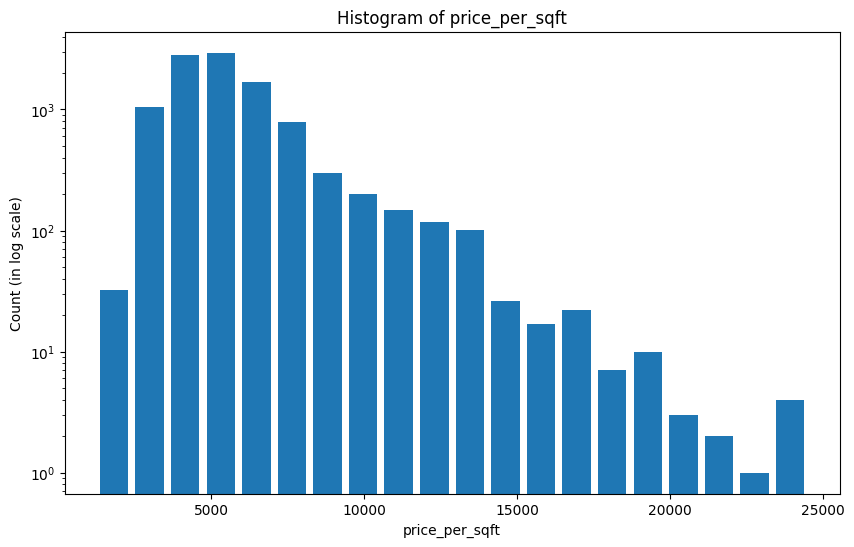

In [1581]:
plot_histogram(df, 'price_per_sqft')

If for a given location how does the 2 BHK and 3 BHK property prices varies / looks like:

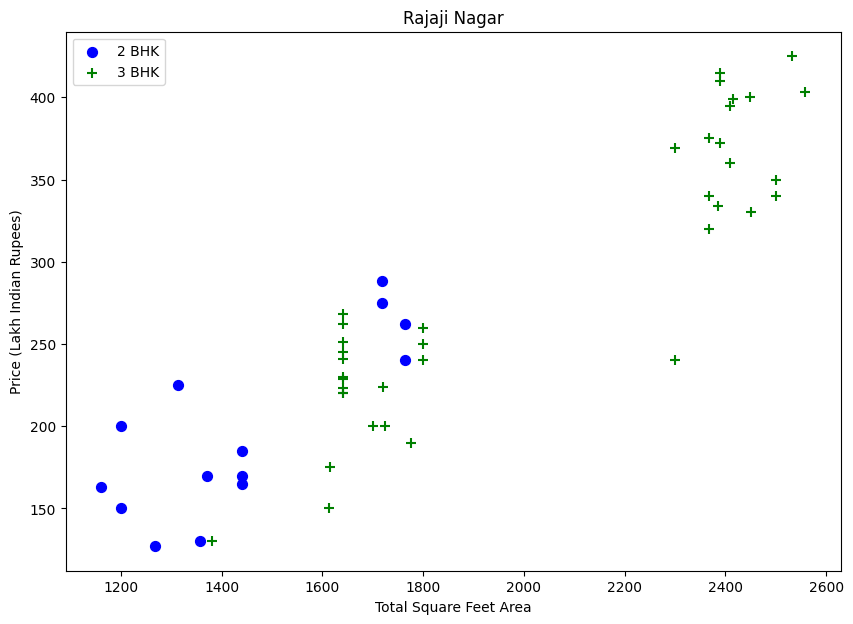

In [1582]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    plt.rcParams['figure.figsize'] = (10,7)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df, "Rajaji Nagar")

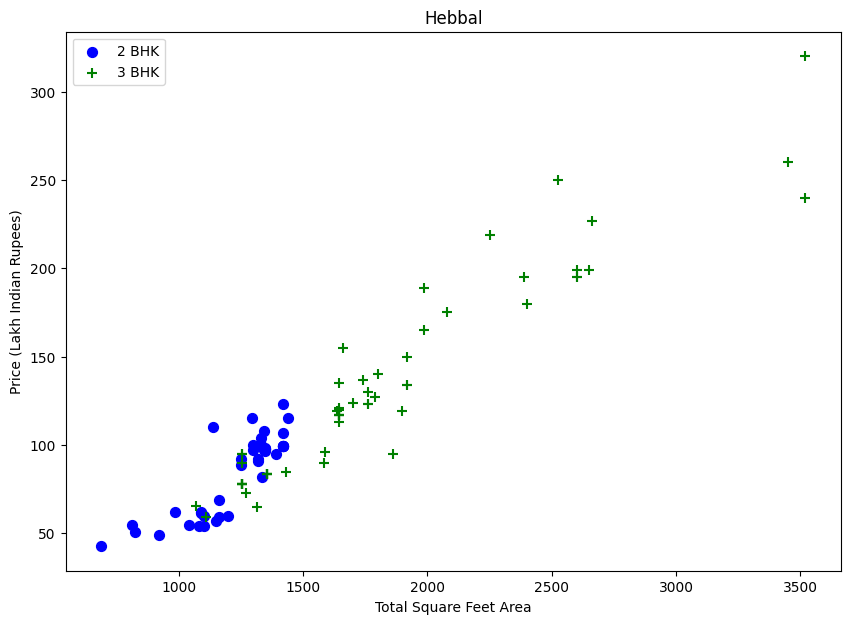

In [1583]:
plot_scatter_chart(df, "Hebbal")

**We should also remove properties where for same location, the price of 3 bhk apartment is less than 2 bhk apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

In [1584]:
{
    '1' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },    
}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [1585]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index')

df = remove_bhk_outliers(df)
df.shape

(7342, 7)

Plotting the same scatter again to visualize 'price_per_sqft' for '2 BHK' and '3 BHK' properties.

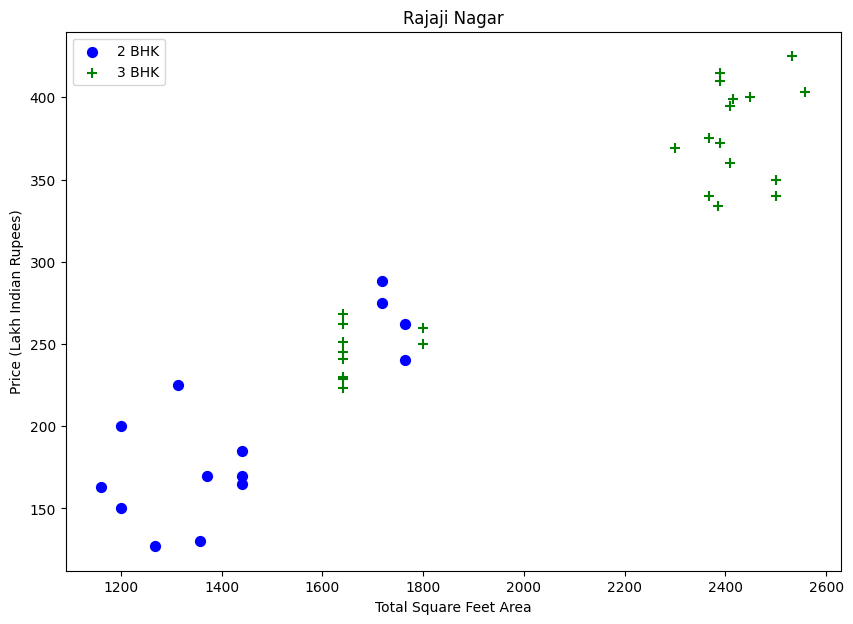

In [1586]:
plot_scatter_chart(df, "Rajaji Nagar")

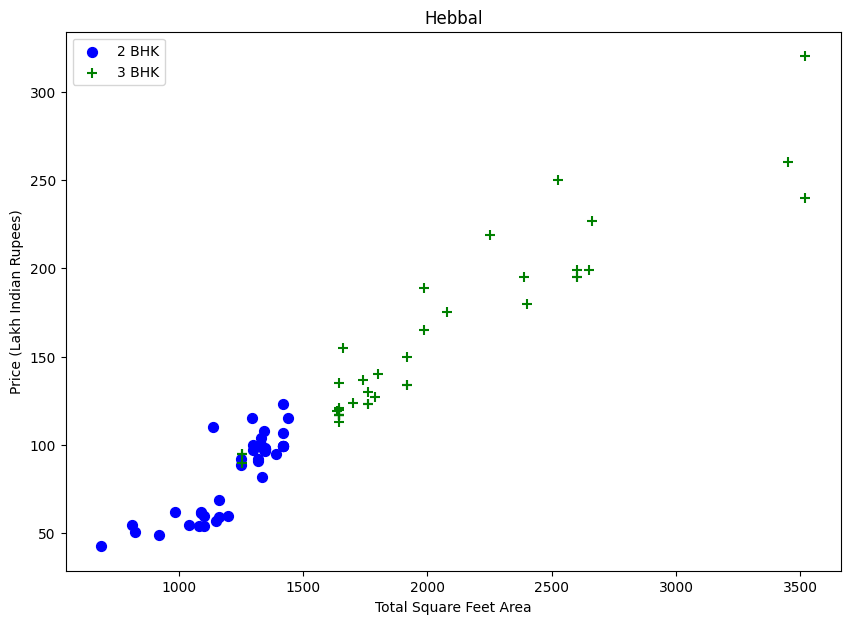

In [1587]:
plot_scatter_chart(df, "Hebbal")

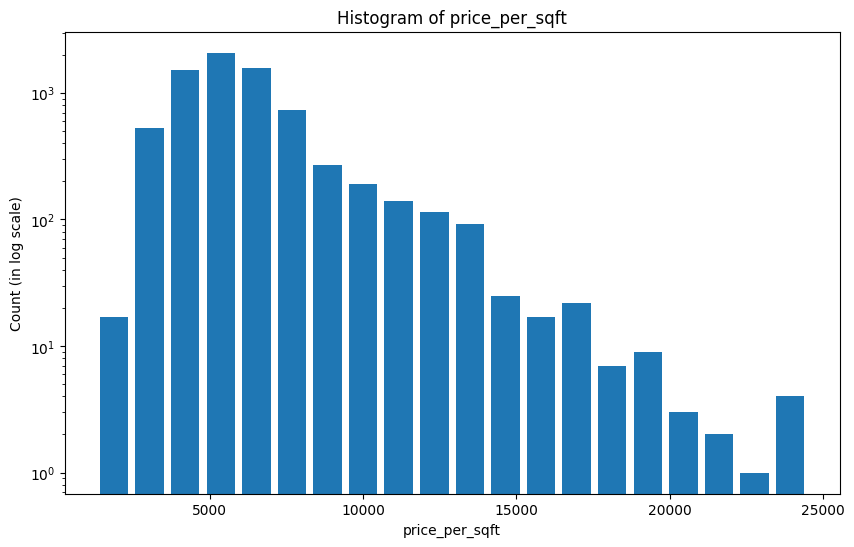

In [1588]:
plot_histogram(df, 'price_per_sqft')

## Outlier Removal Using Bathrooms Feature

In [1589]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  0.,  7.,  9., 12., 16., 13.])

In [1590]:
df[df.bath > 10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
5306,Neeladri Nagar,4000.0,12.0,0.0,160.0,10,4000.000000
8527,other,12000.0,12.0,0.0,525.0,10,4375.000000
8616,other,10000.0,16.0,0.0,550.0,16,5500.000000
9351,other,6000.0,12.0,0.0,150.0,11,2500.000000
9682,other,5425.0,13.0,0.0,275.0,13,5069.124424


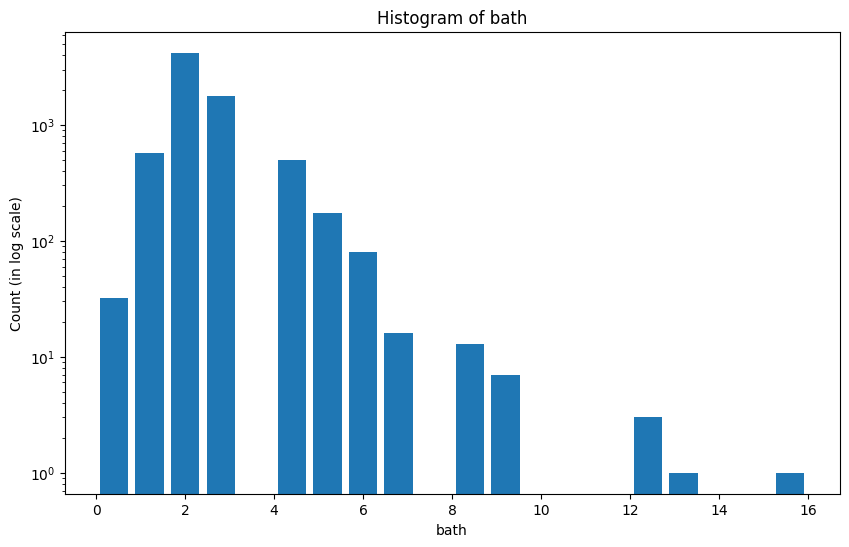

In [1591]:
plot_histogram(df, 'bath')

It is unusual to have 2 more bathrooms than number of bedrooms in a home.

In [1592]:
df[df.bath > df.bhk + 2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1634,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5267,Nagasandra,7000.0,8.0,0.0,450.0,4,6428.571429
6748,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8452,other,11338.0,9.0,1.0,1000.0,6,8819.897689


If you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have 'total bath = total bed + 1 max'. Anything above that is an outlier or a data error and can be removed.

In [1593]:
df.shape

(7342, 7)

In [1594]:
df = df[df.bath < df.bhk + 2]
df.shape

(7264, 7)

In [1595]:
df

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10279,other,1200.0,2.0,3.0,70.0,2,5833.333333
10280,other,1800.0,1.0,1.0,200.0,1,11111.111111
10283,other,1353.0,2.0,2.0,110.0,2,8130.081301
10284,other,812.0,1.0,0.0,26.0,1,3201.970443
